# **Exploratory Analysis of Telecom Customer Churn Factors**

---



#Importing important libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Reading the data set


In [ ]:
df=pd.read_csv('/content/Telco-Customer-Churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Unnamed: 21,Tenure Group
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,NaN,48+
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,No,No,One year,No,Mailed check,56.95,1889.50,No,NaN,NaN
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,NaN,NaN
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,NaN,NaN
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,NaN,NaN


#Data Cleaning

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 


In [ ]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'Unnamed: 21', 'Tenure Group'],
      dtype='object')

In [ ]:
#dropping unnecessary columns
df.drop(['customerID', 'Unnamed: 21', 'Tenure Group'], axis=1, inplace=True)

In [ ]:
#Converting total charges into numeric
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df.dropna(inplace=True)

In [ ]:
#Converted senior citizen value from 0 and 1 to yes and No.
def conv(value):
    if value == 1:
        return 'Yes'
    else:
        return 'No'

# Apply the function to the 'SeniorCitizen' column
df['SeniorCitizen'] = df['SeniorCitizen'].apply(conv)

In [ ]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,No,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,No,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,No,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,No,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


# Summary of numerical columns (statistical info for numerical columns)


In [ ]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Unnamed: 21
count,7032.000000,7032.000000,7032.000000,7032.000000,0.0
mean,0.162400,32.421786,64.798208,2283.300441,NaN
std,0.368844,24.545260,30.085974,2266.771362,NaN
min,0.000000,1.000000,18.250000,18.800000,NaN
25%,0.000000,9.000000,35.587500,401.450000,NaN
50%,0.000000,29.000000,70.350000,1397.475000,NaN
75%,0.000000,55.000000,89.862500,3794.737500,NaN
max,1.000000,72.000000,118.750000,8684.800000,NaN


In [ ]:
# Value counts of the target column
df['Churn'].value_counts()

# Percentage distribution
df['Churn'].value_counts(normalize=True) * 100

,proportion
Churn,
No,73.421502
Yes,26.578498


#Univariate Analysis

In [ ]:
print(df.groupby('gender')['Churn'].value_counts(normalize=True))

gender  Churn
Female  No       0.730405
        Yes      0.269595
Male    No       0.737954
        Yes      0.262046
Name: proportion, dtype: float64


In [ ]:
print(df.groupby('Contract')['Churn'].value_counts(normalize=True))

Contract        Churn
Month-to-month  No       0.572903
                Yes      0.427097
One year        No       0.887228
                Yes      0.112772
Two year        No       0.971513
                Yes      0.028487
Name: proportion, dtype: float64


# Visualize Churn Distribution:

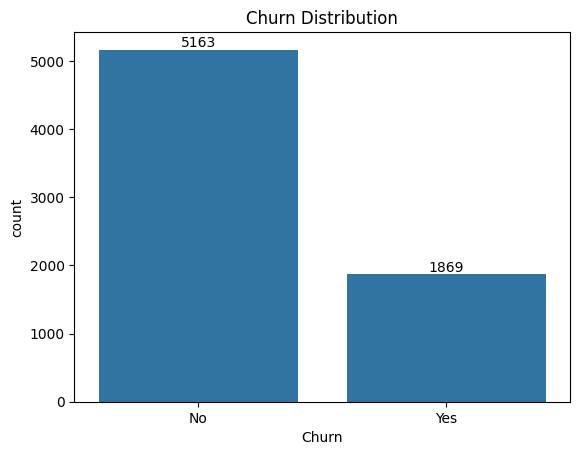

In [ ]:
# Count plot of Churn
ax = sns.countplot(x='Churn', data=df)
plt.title('Churn Distribution')
ax.bar_label(ax.containers[0])
plt.show()

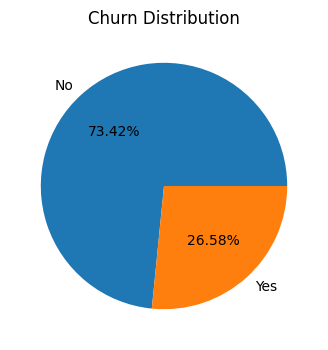

In [ ]:
#This is a pie chart showing overall churn in percentage
plt.figure(figsize=(4, 4))
gb = df.groupby('Churn').agg({'Churn': 'count'})
plt.pie(gb['Churn'], labels = gb.index, autopct='%1.2f%%')
plt.title('Churn Distribution')
plt.show()

 From the given pie chart, most customers stay, but about 27% leave. This shows there is a potential area for improvement in customer retention.

# Now, exploring the factors behind churn

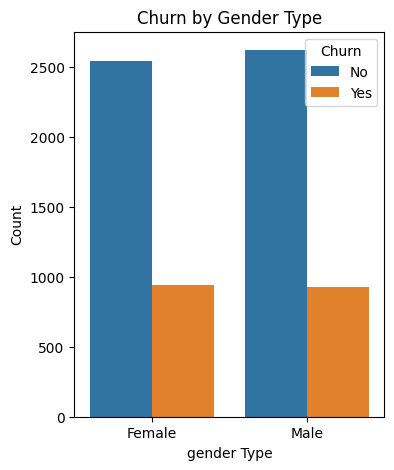

In [ ]:
plt.figure(figsize=(4,5))
sns.countplot(x='gender', hue='Churn', data=df)
plt.title('Churn by Gender Type')
plt.xlabel('gender Type')
plt.ylabel('Count')
plt.show()

From the given plot, we can say that the churn is not gender specific.

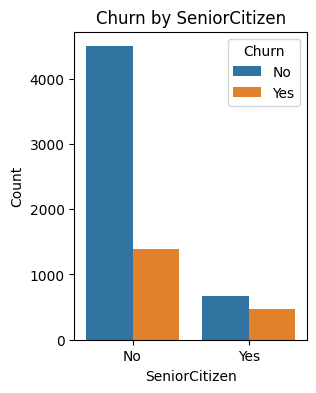

In [ ]:
plt.figure(figsize=(3, 4))
sns.countplot(x='SeniorCitizen', hue='Churn', data=df)

plt.title('Churn by SeniorCitizen')
plt.xlabel('SeniorCitizen')
plt.ylabel('Count')
plt.show()

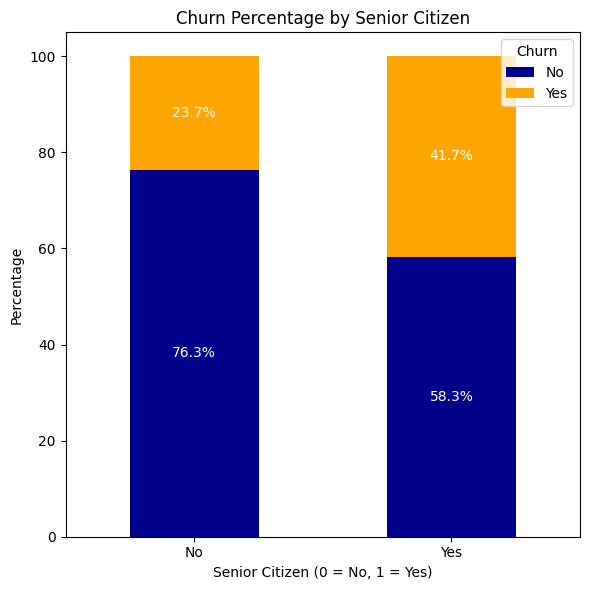

In [ ]:
# Step 1: Count Churn for each SeniorCitizen group
count_data = df.groupby(['SeniorCitizen', 'Churn']).size().unstack()

# Step 2: Convert counts to percentage
percent_data = count_data.div(count_data.sum(axis=1), axis=0) * 100

# Step 3: Plot the stacked bar chart
ax = percent_data.plot(kind='bar', stacked=True, figsize=(6, 6), color=['darkblue', 'orange'])

plt.title('Churn Percentage by Senior Citizen')
plt.xlabel('Senior Citizen (0 = No, 1 = Yes)')
plt.ylabel('Percentage')
plt.xticks(rotation=0)

# Step 4: Add percentage labels
for i in range(len(percent_data)):
    bottom = 0
    for j in range(len(percent_data.columns)):
        value = percent_data.iloc[i, j]
        if value > 0:
            ax.text(i, bottom + value / 2, f'{value:.1f}%', ha='center', va='center', fontsize=10, color='white')
            bottom += value

plt.legend(title='Churn', loc='upper right')
plt.tight_layout()
plt.show()


Senior Citizens have comapritavily more chur than non-senior citizens

# Tenure Distribution (How long customers have stayed)

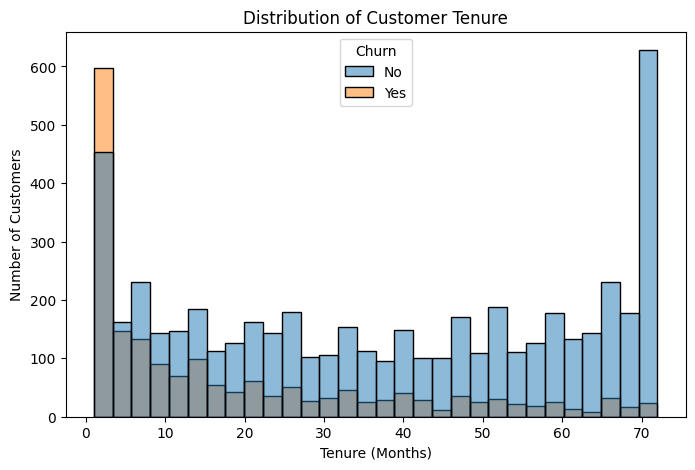

In [ ]:
plt.figure(figsize=(8, 5))
sns.histplot(data = df, x = 'tenure',bins=30, color='skyblue', hue = 'Churn')
plt.title('Distribution of Customer Tenure')
plt.xlabel('Tenure (Months)')
plt.ylabel('Number of Customers')
plt.show()

**Observations from the Tenure Histogram:**

1. High Churn at the Beginning (0–1 months): This might reflect poor onboarding, unmet expectations, or uncompetitive offerings for new users.

2. Steady Decline and Flat Midsection (10–60 months): Customers who stay beyond the first few months tend to continue for a relatively steady period, showing moderate retention.

3. Another Peak at 70–72 Months: These could be loyal customers who’ve been with the company for the full duration. This segment may be highly satisfied or have long-term contracts.



#Churn by contract

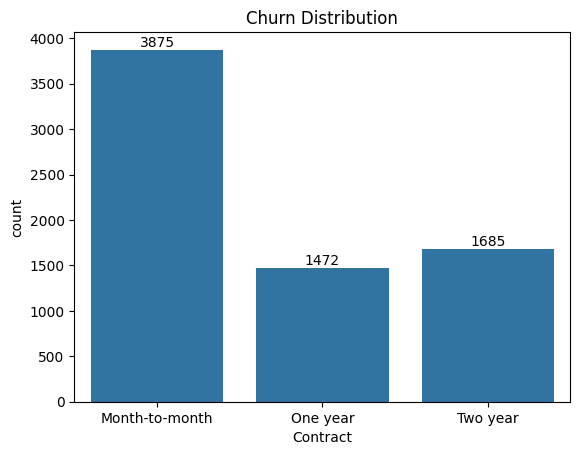

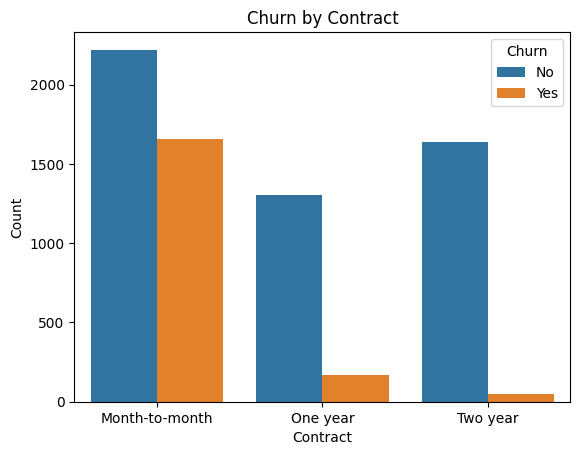

In [ ]:
# Count plot of Churn
ax = sns.countplot(x='Contract', data=df)
plt.title('Churn Distribution')
ax.bar_label(ax.containers[0])
plt.show()

sns.countplot(x='Contract', hue='Churn', data=df)
plt.title('Churn by Contract')
plt.xlabel('Contract')
plt.ylabel('Count')
plt.show()

From the given chart, customer retention improves with longer contract durations, and month-to-month plans exhibit the highest churn rates than those who have 1 or 2 years plans. This trend suggests that incentivizing longer contracts could reduce churn rates.

In [ ]:
df.columns.values

array(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

#Service-Wise Churn Comparison in Telecom Dataset

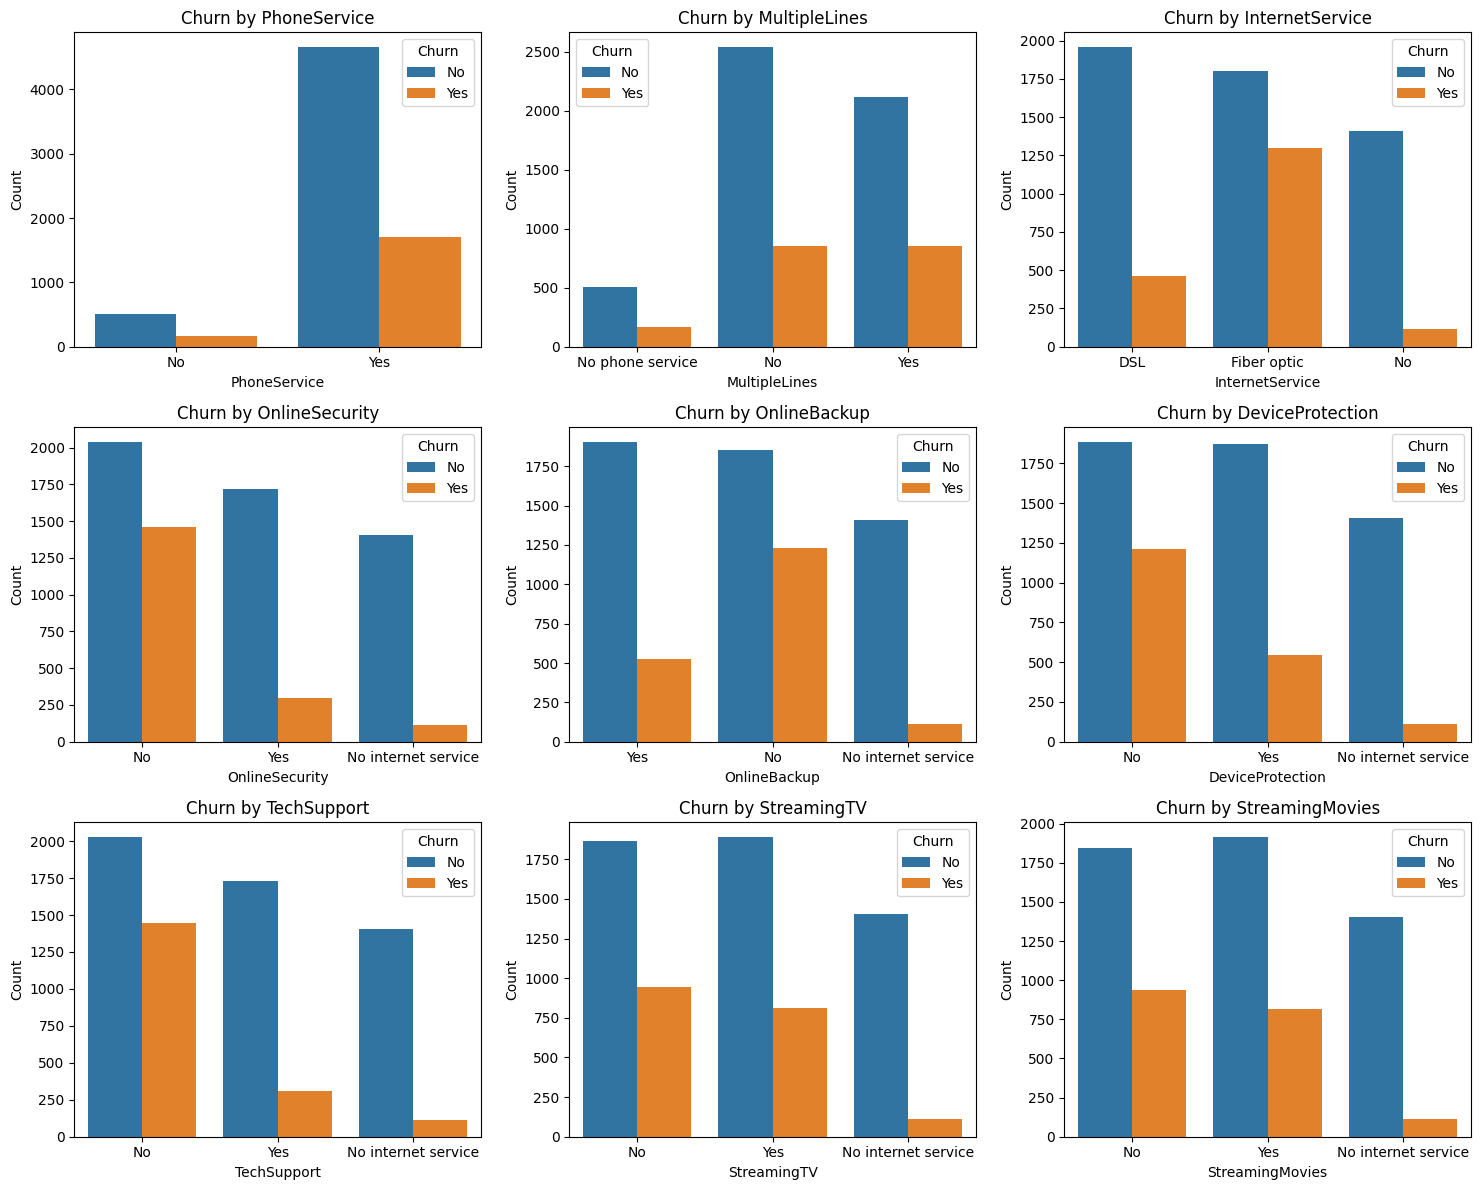

In [ ]:
# List of service-related columns
cols = [
    'PhoneService', 'MultipleLines', 'InternetService',
    'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
    'TechSupport', 'StreamingTV', 'StreamingMovies'
]

n_cols = 3
n_rows = (len(cols) + n_cols - 1) // n_cols #calculate numbers of rows needed

#create subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, n_rows * 4)) #adjust fig as needed

# Flatten the axes array for easier iteration
axes = axes.flatten()

for i, col in enumerate(cols):
  # Use the single Axes object from the flattened array
  sns.countplot(x=col, hue='Churn', data=df, ax=axes[i])
  axes[i].set_title(f'Churn by {col}')
  axes[i].set_xlabel(col)
  axes[i].set_ylabel('Count')

#Remove empty subplots
# Start the loop from the number of columns to remove the remaining axes
for i in range(len(cols), n_rows * n_cols):
  fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

# Here are the key insights from these subplots.

**1. PhoneService:**
Customers with Phone Service are more likely to churn compared to those without.

However, a majority still do not churn, indicating that this service alone isn't a strong churn driver.

**2. MultipleLines:**
Churn is higher among customers who have multiple lines than those who do not.

No phone service group has the lowest churn, but it's also a small segment.

**3. InternetService:**
Fiber optic users show a much higher churn rate than DSL or those without internet.

This may suggest dissatisfaction with fiber service or pricing.

**4. OnlineSecurity:**
Churn is significantly higher among those without online security.

Customers who have OnlineSecurity tend to stay longer.

**5. OnlineBackup:**
Similar to OnlineSecurity, customers without online backup churn more.

Offering backup services may reduce churn.

**6. DeviceProtection:**
Customers without device protection show a higher churn rate.

Those who opt for this add-on appear more committed to the service.

**7. TechSupport:**
One of the strongest patterns: customers without tech support churn the most.

Tech support availability correlates with retention.

**8. StreamingTV:**
Customers with StreamingTV churn slightly more than those without it.

Still, not as strong an indicator as security/tech support.

**9. StreamingMovies:**
Churn is higher among those who use StreamingMovies compared to those who don't.

The difference is moderate, similar to StreamingTV.



**Churn by Payment Method**

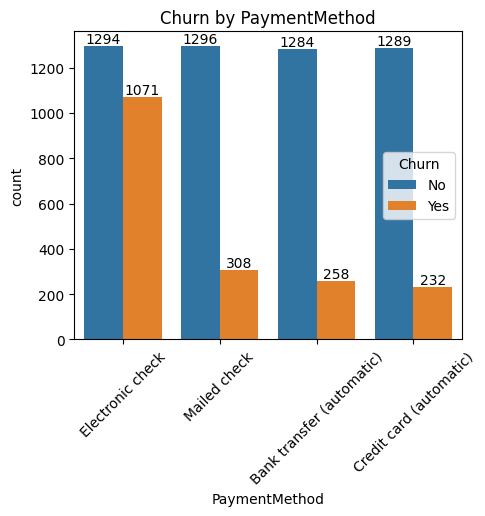

In [ ]:
plt.figure(figsize=(5, 4))
ax = sns.countplot(x='PaymentMethod', hue='Churn', data=df)

# plt.xlabel('PaymentMethod')
# plt.ylabel('Count')
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.xticks(rotation=45)
plt.title('Churn by PaymentMethod')
plt.show()

 **Insights from Churn by PaymentMethod Plot:**
* Electronic Check users show the highest churn rate.

* 1071 customers churned vs 1294 who stayed.

* This suggests electronic check users might be less loyal or more price-sensitive.

* Mailed Check, Bank Transfer (automatic), and Credit Card (automatic) users have significantly lower churn rates.

* Each of these methods shows much higher "No" (non-churn) counts compared to "Yes".

* Indicates that automatic payments are correlated with higher customer retention.

**MonthlyCharges Distribution**



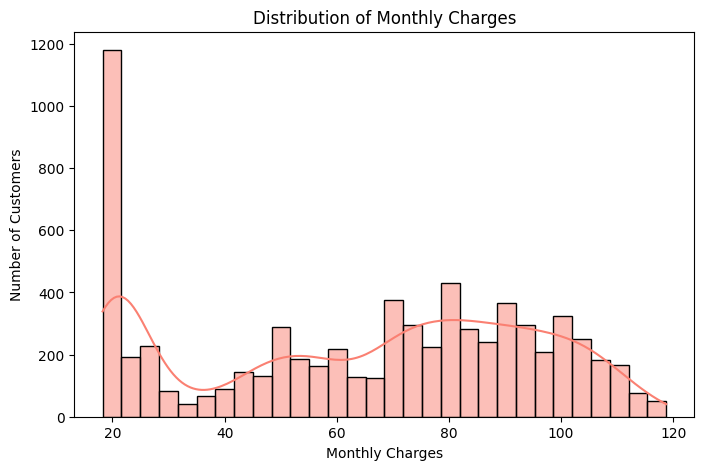

In [ ]:
plt.figure(figsize=(8, 5))
sns.histplot(df['MonthlyCharges'], kde=True, bins=30, color='salmon')
plt.title('Distribution of Monthly Charges')
plt.xlabel('Monthly Charges')
plt.ylabel('Number of Customers')
plt.show()

 **TotalCharges Distribution**

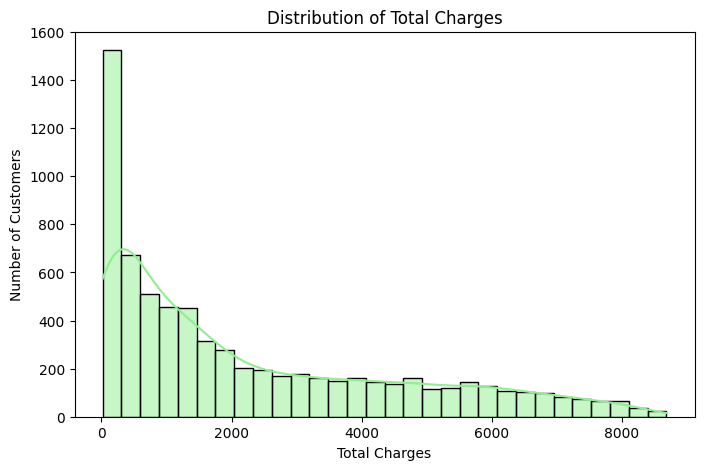

In [ ]:
plt.figure(figsize=(8, 5))
sns.histplot(df['TotalCharges'], kde=True, bins=30, color='lightgreen')
plt.title('Distribution of Total Charges')
plt.xlabel('Total Charges')
plt.ylabel('Number of Customers')
plt.show()

# Bivariate Analysis:
This helps us understand how each feature affects customer churn.

 1. Churn vs. Tenure

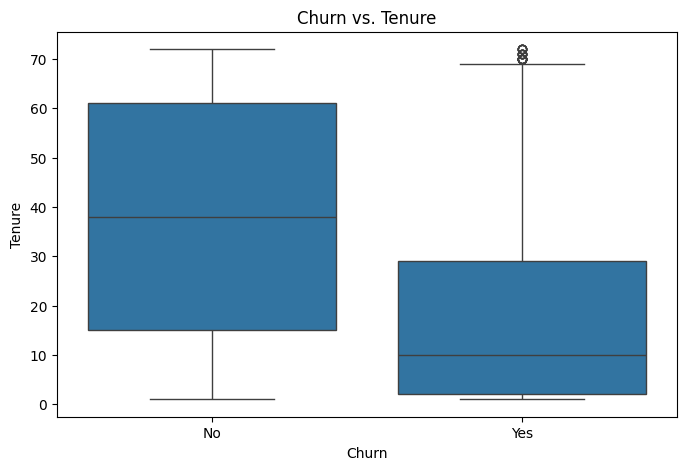

In [ ]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='Churn', y='tenure', data=df)
plt.title('Churn vs. Tenure')
plt.xlabel('Churn')
plt.ylabel('Tenure')
plt.show()

*Insight: Churned customers often have lower tenure (shorter stay with the company).*

2. Churn vs. Monthly Charges

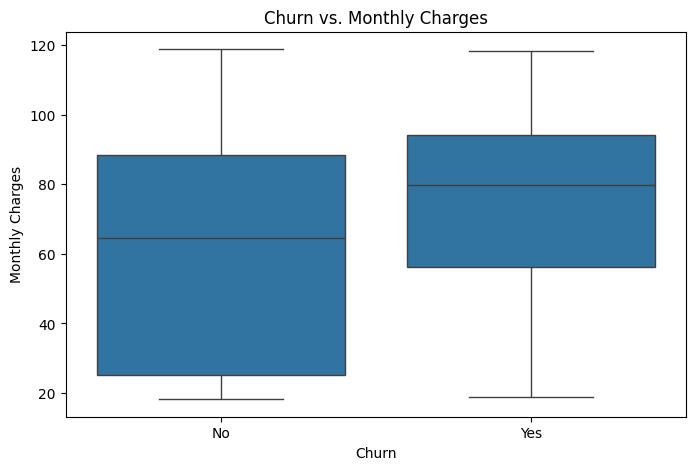

In [ ]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='Churn', y='MonthlyCharges', data=df)
plt.title('Churn vs. Monthly Charges')
plt.xlabel('Churn')
plt.ylabel('Monthly Charges')
plt.show()

* Insight: Customers paying higher monthly charges are more likely to churn.

3. Churn vs. Categorical Features (e.g., Contract Type)

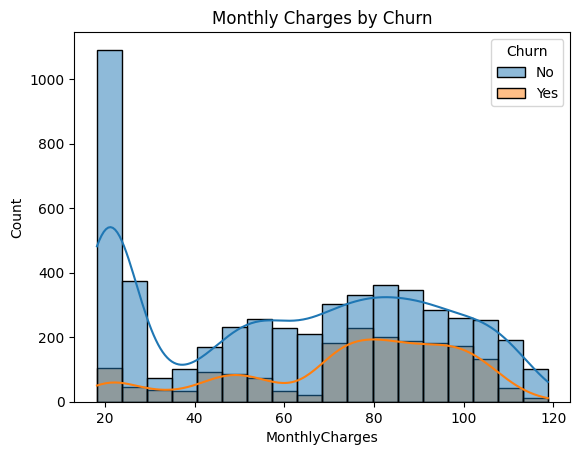

In [ ]:
# Histogram of MonthlyCharges
sns.histplot(data=df, x='MonthlyCharges', hue='Churn', kde=True)
plt.title('Monthly Charges by Churn')
plt.show()

 * Customers with lower monthly charges are significantly more likely to churn compared to those with higher charges.

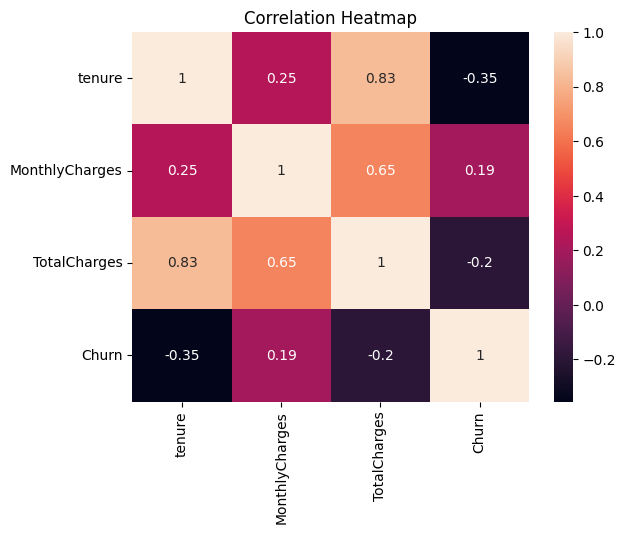

In [ ]:
# Heatmap of correlations (after converting categorical to numeric if needed)
df_encoded = df.copy()
df_encoded['Churn'] = df_encoded['Churn'].map({'Yes': 1, 'No': 0})
corr = df_encoded.corr(numeric_only=True)
sns.heatmap(corr, annot=True)
plt.title('Correlation Heatmap')
plt.show()

The heatmap shows weak to moderate relationships among the variables. Key points are:

* Longer customer tenure is strongly linked to higher total charges.
* Monthly charges are positively related to total charges.
* Customers with shorter tenure are more likely to churn.
* Other relationships among variables are generally weak.

Overall, tenure and charges are closely connected, and shorter tenure is associated with increased churn risk.

# Conclusion

The customer churn analysis effectively highlighted the key patterns and features that influence customer attrition in a telecom setting. Using exploratory data analysis, we identified meaningful trends that can support data-driven decision-making for improving customer retention.

**Key Insights:**

* **Tenure is Critical:** Customers with a shorter tenure (i.e., newer customers) are far more likely to churn compared to long-term customers.

* **Contract Type Matters:** Month-to-month contract users show the highest churn rates. In contrast, those with one- or two-year contracts are more loyal.

* **Monthly Charges Impact Churn:** Higher monthly charges are associated with an increased likelihood of churn, especially when combined with short tenure.

* **Total Charges Are Not Directly Indicative:** While total charges show distribution differences, their standalone impact on churn is less significant compared to tenure or contract.

* **Gender Has Minimal Effect:** Churn patterns between male and female customers are nearly identical, indicating gender is not a strong predictor.

* **Churn Rate:** Around 26.6% of the customers in the dataset have churned, while 73.4% have remained.

**Overall Conclusion:**

This analysis provides a solid foundation for developing predictive models. By identifying high-risk segments—such as short-tenure, high-paying, and month-to-month contract customers—companies can take proactive steps like offering discounts, loyalty programs, or personalized services to reduce churn. These insights not only help improve customer retention but also optimize marketing and operational strategies for better business outcomes.


# Advanced Data Preprocessing

In [ ]:
df = pd.get_dummies(df, drop_first=True)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df[['tenure', 'MonthlyCharges', 'TotalCharges']] = scaler.fit_transform(df[['tenure', 'MonthlyCharges', 'TotalCharges']])

**Feature Engineering**

In [ ]:
def tenure_group(tenure):
    if tenure <= 12:
        return '0-1 Year'
    elif tenure <= 24:
        return '1-2 Years'
    elif tenure <= 48:
        return '2-4 Years'
    elif tenure <= 60:
        return '4-5 Years'
    else:
        return '5-6 Years'
df['TenureGroup'] = df['tenure'].apply(tenure_group)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df[['tenure', 'MonthlyCharges', 'TotalCharges']] = scaler.fit_transform(df[['tenure', 'MonthlyCharges', 'TotalCharges']])

**Training the model**

* Defining features (X) and target (y) before splitting
* X should be all columns except the target column(s) and the 'TenureGroup' column
* y should be the target column(s)

In [ ]:
from sklearn.model_selection import train_test_split

# Dropping 'Churn_Yes' and 'TenureGroup' from the features
X = df.drop(['Churn_Yes', 'TenureGroup'], axis=1)
y = df['Churn_Yes']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape

((5625, 30), (1407, 30))

Using the Logistic Regression model

In [ ]:
from sklearn.linear_model import LogisticRegression

# Create an instance of the Logistic Regression model
# model = LogisticRegression()
model = LogisticRegression(class_weight='balanced', max_iter=1000)


# Fit the model using the training data
model.fit(X_train, y_train)

# You can now access the model's attributes
model.intercept_
model.coef_

array([[-1.36383775, -0.43240354,  0.66296237, -0.0153339 ,  0.25972664,
         0.04264174, -0.22187088, -0.34843906, -0.08520805,  0.25634155,
         1.10690887, -0.15858805, -0.15858805, -0.3521725 , -0.15858805,
        -0.03885583, -0.15858805,  0.03404443, -0.15858805, -0.32602372,
        -0.15858805,  0.3807688 , -0.15858805,  0.38974398, -0.78992164,
        -1.38374259,  0.25032702, -0.08405405,  0.30030319, -0.068411  ]])

In [ ]:
y_pred = model.predict(X_test)                      # Predicted class labels
y_proba = model.predict_proba(X_test)[:, 1]         # Predicted probabilities (for threshold tuning or ROC)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("ROC AUC Score:", roc_auc_score(y_test, y_proba))

Classification Report:
               precision    recall  f1-score   support

       False       0.90      0.71      0.80      1033
        True       0.50      0.79      0.61       374

    accuracy                           0.73      1407
   macro avg       0.70      0.75      0.70      1407
weighted avg       0.80      0.73      0.75      1407

Confusion Matrix:
 [[734 299]
 [ 78 296]]
ROC AUC Score: 0.8317526957980235


In [ ]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=42)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)
model.fit(X_train_res, y_train_res)

LogisticRegression(class_weight='balanced', max_iter=1000)

**Try a Smarter Model**

                                  Feature  Importance
1                          MonthlyCharges   -8.378339
10            InternetService_Fiber optic    7.671361
7                        PhoneService_Yes    3.829870
23                    StreamingMovies_Yes    3.041354
21                        StreamingTV_Yes    2.923052
9                       MultipleLines_Yes    1.732868
0                                  tenure   -1.647477
17                   DeviceProtection_Yes    1.439947
15                       OnlineBackup_Yes    1.302863
8          MultipleLines_No phone service   -1.125532
12     OnlineSecurity_No internet service   -1.062215
11                     InternetService_No   -1.062215
18        TechSupport_No internet service   -1.062215
16   DeviceProtection_No internet service   -1.062215
22    StreamingMovies_No internet service   -1.062215
14       OnlineBackup_No internet service   -1.062215
20        StreamingTV_No internet service   -1.062215
25                      Cont

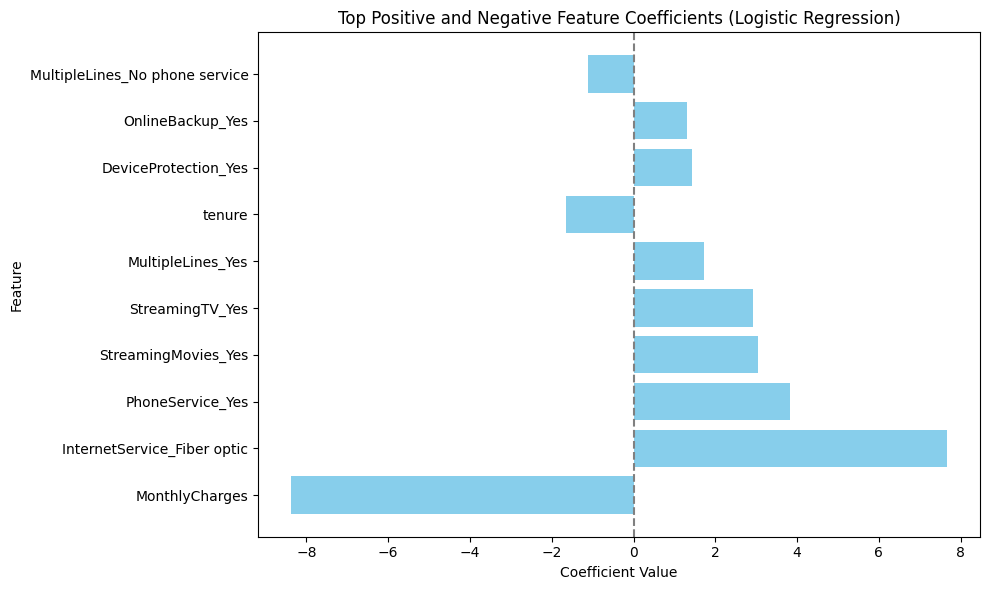

In [ ]:
# Use a different variable name for Logistic Regression
lr_model = LogisticRegression(class_weight='balanced', max_iter=1000)
lr_model.fit(X_train_res, y_train_res)

# If you later train a RandomForestClassifier, use a different variable name
# rf_model = RandomForestClassifier(...)
# rf_model.fit(...)

# Now, when calculating feature importance for Logistic Regression:
feature_importance_lr = pd.DataFrame({
    'Feature': X.columns,
    'Importance': lr_model.coef_[0]
}).sort_values(by='Importance', key=abs, ascending=False)

print(feature_importance_lr)

# And for plotting Logistic Regression coefficients:
top_features_lr = feature_importance_lr.head(10)

plt.figure(figsize=(10,6))
plt.barh(top_features_lr['Feature'], top_features_lr['Importance'], color='skyblue')
plt.axvline(0, color='gray', linestyle='--')
plt.title('Top Positive and Negative Feature Coefficients (Logistic Regression)')
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

# If you were to work with the RandomForestClassifier:
# feature_importance_rf = pd.DataFrame({
#     'Feature': X.columns,
#     'Importance': rf_model.feature_importances_
# }).sort_values(by='Importance', key=abs, ascending=False)
# print(feature_importance_rf)
# ... and so on for plotting RF importances

**Make Predictions:**

Using the trained model to predict churn on test data.

In [ ]:
# Predict class labels
y_pred = model.predict(X_test)

# Predict probabilities (optional, for probability threshold tuning or ROC curve)
y_proba = model.predict_proba(X_test)[:, 1]

# Evaluate Model Performance

**Classification Report**

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       False       0.89      0.75      0.81      1033
        True       0.52      0.74      0.61       374

    accuracy                           0.75      1407
   macro avg       0.70      0.74      0.71      1407
weighted avg       0.79      0.75      0.76      1407



**Confusion Matrix**

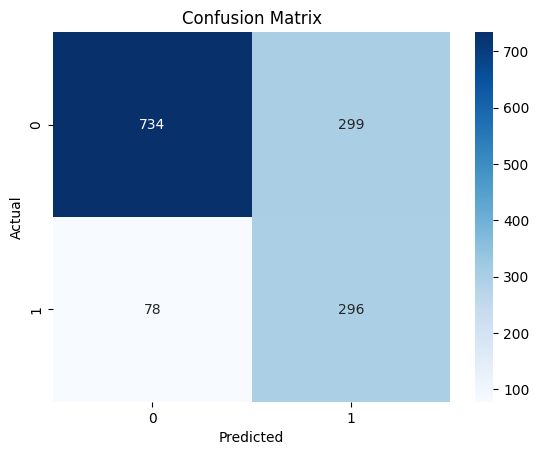

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

 **ROC Curve & AUC**

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
y_proba = model.predict_proba(X_test)[:, 1]
auc_score = roc_auc_score(y_test, y_proba)
print(f"AUC Score: {auc_score:.2f}")

AUC Score: 0.81


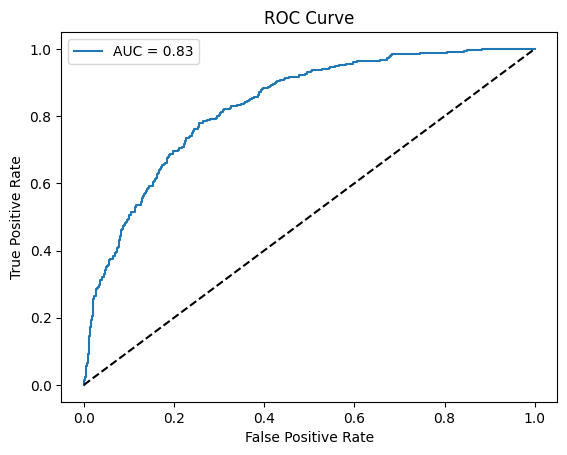

np.float64(0.8317526957980235)

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score

fpr, tpr, thresholds = roc_curve(y_test, y_proba)
plt.plot(fpr, tpr, label=f'AUC = {roc_auc_score(y_test, y_proba):.2f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

y_proba = model.predict_proba(X_test)[:, 1]
roc_auc_score(y_test, y_proba)

 **Feature Importance (Based on Coefficients)**

In [ ]:
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_[0]
}).sort_values(by='Coefficient', key=abs, ascending=False)

print(feature_importance.head(10))  # Top 10 impactful features

                        Feature  Coefficient
25            Contract_Two year    -1.383743
0                        tenure    -1.363838
10  InternetService_Fiber optic     1.106909
24            Contract_One year    -0.789922
2                  TotalCharges     0.662962
1                MonthlyCharges    -0.432404
23          StreamingMovies_Yes     0.389744
21              StreamingTV_Yes     0.380769
13           OnlineSecurity_Yes    -0.352172
7              PhoneService_Yes    -0.348439
